# An analysis of Speed Dating -- Question 4:

## How does a speed dating participant's "intended career" impact the amount of positive matches and positive partner decisions they receive? Does age have an effect on matching?

### This anaylsis begins with creating a dataframe of relevant data; partner decisions, matches, and intended careers. A summary pie chart is produced to show the amount of positive and negative matches for all instances of speed dating. From there, calculations of positive or negative matches based on intended career were run. As well as partner positive or negative decisions(even if no match occurred) based on intended career. The total numbers as well as percentages were figured. These calculations were put into a summary dataframe. Next the intended careers with few participants were dropped in order to prevent skews in the results. The drop was calculated by overall total matches of less than 240 as suggested by the authors of the data. From there, the quartiles and the upper/lower bounds were calculated as well as a whisker box plot to see if there were any potential outliers. No outliers were shown and the lower quartile was set at 15.2 and upper quartile was set at 18.7. A bar chart was created to show the careers that had the best percentages of finding a positive match. The two careers that found the most success(in the upper quartile) were Psychologist and Lawyer. The two careers that found least success(lower quartile) were those who were undecided for their intended career and those looking to be apart of International Affairs. Positive Partner Decisions was the next focus. A positive partner decision is recorded as receiving a yes from your speed dating partner, even though you chose no for them leading to a negative match. Quartiles along with a box and whisker plot was also created. Psychologists and Academic Research were in the lower quartile, with Doctor and International Affairs in the upper quartile. But all percentages for each career were within 10 points of eachother, so there was no significance between intended career and the rate of positive partner decisions. Finally, there is a bar chart summarizing total numbers of matches and partner decisions per career.

### The next piece of analysis looks into age and total number of positive or negative matches, starting with a trimmed dataframe of the relevant information. Again the dataframe had to be trimmed in order that ages with small numbers of participants did not skew the results. And the results turned out to also be insignificant. Scatter plots for both positive and negative matches per age were created along with linear regressions and correlation statistics. Negative matches based on age had a correlation of 0.14. This means there is no correlation between age and negative matches. Postive matches had a correlation of -0.08. Also no correlation.

In [22]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts
from scipy.stats import linregress

In [23]:
# Reference the file where the CSV is located
file = "Output/CleanedSpeed.csv"

# Imported the data into a Pandas DataFrame
dating_df = pd.read_csv(file)
dating_df

,Unique ID,Gender,Wave,Match,Same Race,Age of Partner,Race of Partner,Partner Preference Attractive,Partner Preference Sincere,Partner Preference Intelligence,...,Own Rating Ambition,Decision,Estimation of Matches,Number of Dates,Your Preference Attractive Post-Date,Your Preference Sincere Post-Date,Your Preference Intelligence Post-Date,Your Preference Fun Post-Date,Your Preference Ambition Post-Date,Your Preference Shared Interests Post-Date
0,1,Female,1,No,No,27.0,White,35.0,20.0,20.0,...,7.0,Yes,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0
1,1,Female,1,No,No,22.0,White,60.0,0.0,0.0,...,7.0,Yes,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0
2,1,Female,1,Yes,Yes,22.0,Asian,19.0,18.0,19.0,...,7.0,Yes,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0
3,1,Female,1,Yes,No,23.0,White,30.0,5.0,15.0,...,7.0,Yes,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0
4,1,Female,1,Yes,No,24.0,Latino,30.0,10.0,20.0,...,7.0,Yes,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6811,552,Male,21,No,No,26.0,Latino,10.0,10.0,30.0,...,7.0,No,3.0,1.0,70.0,0.0,20.0,10.0,0.0,0.0
6812,552,Male,21,No,No,24.0,Other,50.0,20.0,10.0,...,7.0,No,3.0,1.0,70.0,0.0,20.0,10.0,0.0,0.0
6813,552,Male,21,No,No,29.0,Latino,40.0,10.0,30.0,...,7.0,No,3.0,1.0,70.0,0.0,20.0,10.0,0.0,0.0
6814,552,Male,21,No,No,22.0,Asian,10.0,25.0,25.0,...,7.0,No,3.0,1.0,70.0,0.0,20.0,10.0,0.0,0.0


In [24]:
# Renaming the Decision of Partner column from 0 to no's and 1 to yes's for a cleaner look
dating_df['Decision of Partner'] = dating_df['Decision of Partner'].replace([0],'No')
dating_df['Decision of Partner'] = dating_df['Decision of Partner'].replace([1],'Yes')

In [25]:
# Dataframe with relevant material to perfrom necessary calculations and charts
career_match = dating_df[['Decision of Partner','Match','Intended Career']]
# Drop the blank rows for cleaner results
career_match.dropna(how='any', inplace=True)
career_match

/Users/tommysmacbook/opt/anaconda3/envs/pythondata1/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Decision of Partner,Match,Intended Career
30,No,No,Lawyer
31,No,No,Lawyer
32,Yes,No,Lawyer
33,Yes,Yes,Lawyer
34,Yes,No,Lawyer
...,...,...,...
6811,Yes,No,Other
6812,No,No,Other
6813,No,No,Other
6814,Yes,No,Other


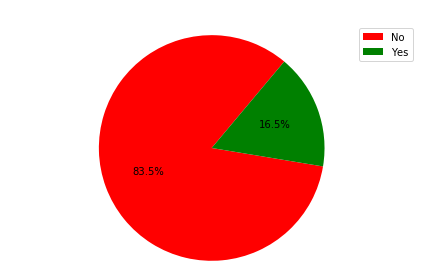

In [27]:
# Pie chart of total matches positive or negative for a summary statistic
total_matches = career_match['Match'].value_counts()

colors = ['red','green']
explode = (0,0)
labels = list(total_matches.index)

plt.pie(total_matches, explode=explode, colors=colors, autopct='%1.1f%%', startangle=50)
plt.subplots_adjust(top=.5)
plt.rcParams["figure.figsize"] = (6, 4)
plt.title("Percentage of Positive and Negative Matches", fontsize='14', color='white')
plt.legend(labels, loc='upper right', frameon=True, bbox_to_anchor=(1, 1))
plt.axis('equal')
plt.tight_layout()
plt.savefig("Output/Q4_images/Fig1.png", bbox_inches = 'tight')
plt.show()

In [28]:
# amount of postive matches per career
yes_df = career_match.loc[career_match['Match']=='Yes']
career_yes = yes_df.groupby(['Intended Career']).count()['Match']

# amount of negative matches per career
no_df = career_match.loc[career_match['Match']=='No']
career_no = no_df.groupby(['Intended Career']).count()['Match']

In [29]:
# amount of no partner decisions per career
no_dec_df = career_match.loc[career_match['Decision of Partner']=='No']
dec_no = no_dec_df.groupby(['Intended Career']).count()['Decision of Partner']

# amount of yes partner decisions per career
yes_dec_df = career_match.loc[career_match['Decision of Partner']=='Yes']
dec_yes = yes_dec_df.groupby(['Intended Career']).count()['Decision of Partner']

In [30]:
# Percentages of yes or no decisions per career
total_dec = (dec_yes + dec_no)
dec_perc_yes = (dec_yes / total_dec) * 100
dec_perc_no = (dec_no / total_dec) * 100

# Percentages of yes or no matches per career
total_match = (career_yes + career_no)
match_perc_yes = (career_yes / total_match) * 100
match_perc_no = (career_no / total_match) * 100

In [31]:
# Summary dataframe for calculation results
total_summary_df = pd.DataFrame({"Number of Positive Matches": career_yes,
                                    "Number of Negative Matches": career_no,
                                    "Total Matches": total_match,
                                    "Number of Positive Decisions": dec_yes,
                                    "Number of Negative Decisions": dec_no,
                                    "Percentage of Positive Matches": match_perc_yes,
                                    "Percentage of Negative Matches": match_perc_no,
                                    "Percentage of Positive Decisions": dec_perc_yes,
                                    "Percentage of Negative Decisions": dec_perc_no})
total_summary_df

,Number of Positive Matches,Number of Negative Matches,Total Matches,Number of Positive Decisions,Number of Negative Decisions,Percentage of Positive Matches,Percentage of Negative Matches,Percentage of Positive Decisions,Percentage of Negative Decisions
Intended Career,,,,,,,,,
Academic/Research,273,1487,1760,685,1075,15.511364,84.488636,38.920455,61.079545
Architecture,1,9,10,4,6,10.000000,90.000000,40.000000,60.000000
Athletics,3,7,10,4,6,30.000000,70.000000,40.000000,60.000000
Business/Finance,277,1315,1592,669,923,17.399497,82.600503,42.022613,57.977387
Creative Arts,103,545,648,272,376,15.895062,84.104938,41.975309,58.024691
Doctor,67,302,369,175,194,18.157182,81.842818,47.425474,52.574526
Engineer,36,198,234,79,155,15.384615,84.615385,33.760684,66.239316
International Affairs,56,339,395,184,211,14.177215,85.822785,46.582278,53.417722
Journalism,8,36,44,19,25,18.181818,81.818182,43.181818,56.818182


In [32]:
# Trim the dataframe to account for low numbers of participants within a intended career in order to prevent skewing the data
trimmed_df = total_summary_df.drop(total_summary_df[total_summary_df['Total Matches']<240].index)
trimmed_df

,Number of Positive Matches,Number of Negative Matches,Total Matches,Number of Positive Decisions,Number of Negative Decisions,Percentage of Positive Matches,Percentage of Negative Matches,Percentage of Positive Decisions,Percentage of Negative Decisions
Intended Career,,,,,,,,,
Academic/Research,273,1487,1760,685,1075,15.511364,84.488636,38.920455,61.079545
Business/Finance,277,1315,1592,669,923,17.399497,82.600503,42.022613,57.977387
Creative Arts,103,545,648,272,376,15.895062,84.104938,41.975309,58.024691
Doctor,67,302,369,175,194,18.157182,81.842818,47.425474,52.574526
International Affairs,56,339,395,184,211,14.177215,85.822785,46.582278,53.417722
Lawyer,129,500,629,285,344,20.508744,79.491256,45.310016,54.689984
Psychologist,53,188,241,97,144,21.991701,78.008299,40.248963,59.751037
Undecided,45,302,347,144,203,12.968300,87.031700,41.498559,58.501441


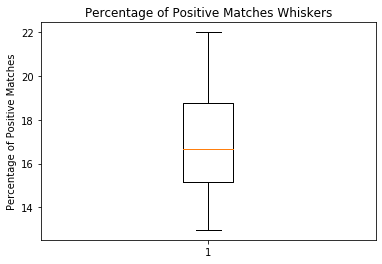

0.25    15.177827
0.50    16.647280
0.75    18.745072
Name: Percentage of Positive Matches, dtype: float64
9.8269580292516


24.09594068389022

In [33]:
# Whisker and box plot of percentage of positive matches to visualize the upper and lower quartiles, whiskers, and potential outliers
fig1, ax1 = plt.subplots()
ax1.set_title('Percentage of Positive Matches Whiskers')
ax1.set_ylabel('Percentage of Positive Matches')
ax1.boxplot(trimmed_df['Percentage of Positive Matches'])
plt.savefig("Output/Q4_images/Fig2.png", bbox_inches = 'tight')
plt.show()

# Potential outliers for rate of positive matches per intended career
quartiles = trimmed_df['Percentage of Positive Matches'].quantile([.25,.5,.75])
print(quartiles)
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq
iqr
lowerbound = lowerq - (1.5 * iqr)
print(lowerbound)
upperbound = upperq + 1.5 * iqr
upperbound

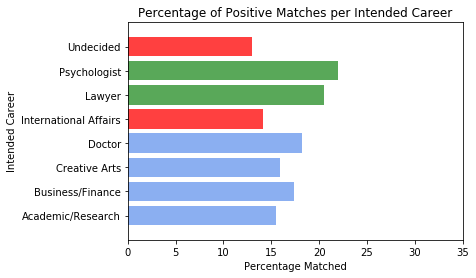

In [34]:
# bar chart to show all "intended careers" rate of positive matches
x_axis = np.arange(len(trimmed_df))
y_axis = trimmed_df['Percentage of Positive Matches']

tick_loc = [value for value in x_axis]
colors = [('forestgreen' if y >= 20 else ('red' if y <= 15 else 'cornflowerblue')) for y in y_axis]
x_ticks = list(trimmed_df.index.values)
plt.yticks(tick_loc, x_ticks, rotation='0')

plt.xlim(0, 35)
plt.ylim(-1, len(x_axis))
plt.rcParams["figure.figsize"] = (7, 5)

plt.title("Percentage of Positive Matches per Intended Career")
plt.xlabel('Percentage Matched')
plt.ylabel('Intended Career')

plt.barh(x_axis, y_axis, color=colors, alpha=.75, align='center')
plt.savefig("Output/Q4_images/Fig3.png", bbox_inches = 'tight')
plt.show()

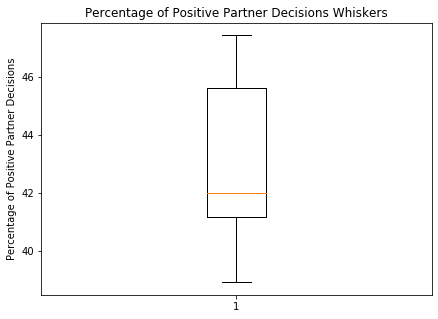

0.25    41.186160
0.50    41.998961
0.75    45.628082
Name: Percentage of Positive Decisions, dtype: float64
34.523277614732095


52.29096390146724

In [35]:
# Whisker and box plot of percentage of positive partner decisions to visualize the upper and lower quartiles, whiskers, and potential outliers
fig1, ax1 = plt.subplots()
ax1.set_title('Percentage of Positive Partner Decisions Whiskers')
ax1.set_ylabel('Percentage of Positive Partner Decisions')
ax1.boxplot(trimmed_df['Percentage of Positive Decisions'])
plt.savefig("Output/Q4_images/Fig4.png", bbox_inches = 'tight')
plt.show()

# Potential outliers for rate of positive partner decisions per intended career
quartiles = trimmed_df['Percentage of Positive Decisions'].quantile([.25,.5,.75])
print(quartiles)
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq
iqr
lowerbound = lowerq - (1.5 * iqr)
print(lowerbound)
upperbound = upperq + 1.5 * iqr
upperbound

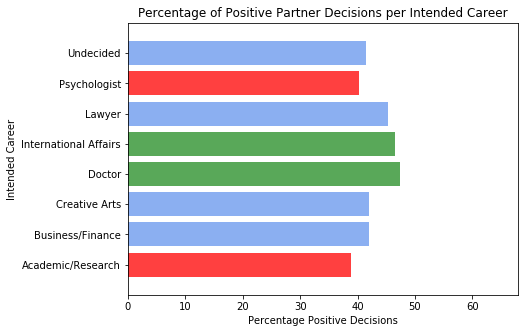

In [36]:
# bar chart of postive partner decision percentages per intended career. partner decisions show how many people
# said yes to a particular person
x_axis = np.arange(len(trimmed_df))
y_axis = trimmed_df['Percentage of Positive Decisions']

tick_loc = [value for value in x_axis]
colors = [('forestgreen' if y >= 45.6 else ('red' if y <= 41.2 else 'cornflowerblue')) for y in y_axis]
x_ticks = list(trimmed_df.index.values)
plt.yticks(tick_loc, x_ticks, rotation='0')

plt.xlim(0, 68)
plt.ylim(-1, len(x_axis))
plt.rcParams["figure.figsize"] = (8, 6)

plt.title("Percentage of Positive Partner Decisions per Intended Career")
plt.xlabel('Percentage Positive Decisions')
plt.ylabel('Intended Career')

plt.barh(x_axis, y_axis, color=colors, alpha=.75, align='center')
plt.savefig("Output/Q4_images/Fig5.png", bbox_inches = 'tight')
plt.show()

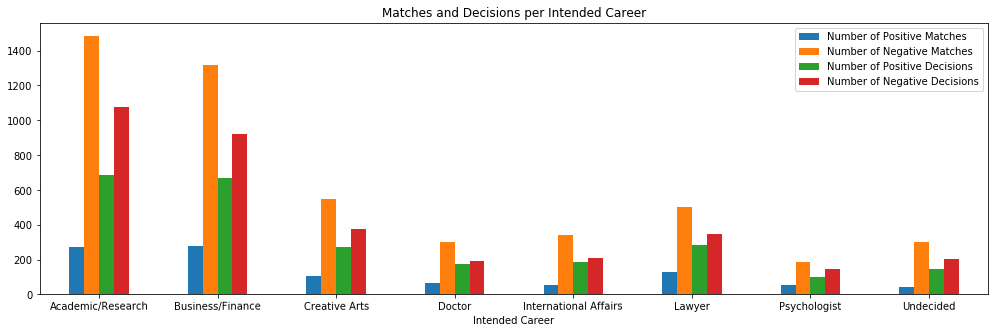

In [37]:
total_trim = trimmed_df.drop(["Percentage of Positive Matches",
                                "Percentage of Negative Matches",
                                "Percentage of Positive Decisions",
                                "Percentage of Negative Decisions",
                                "Total Matches"], axis=1)
# Chart showing total of all matches and partner decisions
total_trim.plot(kind='bar', figsize=(17,5), title='Matches and Decisions per Intended Career',
            rot=0.25)
plt.savefig("Output/Q4_images/Fig6.png", bbox_inches = 'tight')

In [38]:
# Dataframe of matches based on Age for easier visualization of data
age_match = dating_df[['Age', 'Match']]
age_match.dropna(how='any', inplace=True)

/Users/tommysmacbook/opt/anaconda3/envs/pythondata1/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
# Negative matches based on Age
no_match = age_match.loc[age_match['Match']=='No']
no_age = no_match.groupby(['Age']).count()['Match']

In [40]:
# Positive matches per age
yes_match = age_match.loc[age_match['Match']=='Yes']
yes_age = yes_match.groupby(['Age']).count()['Match']

In [41]:
age_df = pd.DataFrame({'Positive Matches': yes_age, 'Negative Matches': no_age})
age_df
trimmed_age = age_df.drop(age_df[age_df['Negative Matches']<217].index)
trimmed_age

,Positive Matches,Negative Matches
Age,,
21.0,64.0,217
22.0,80.0,473
23.0,124.0,591
24.0,103.0,603
25.0,168.0,519
26.0,109.0,592
27.0,127.0,705
28.0,97.0,412
29.0,74.0,428


The correlation between age and the amount of matches is 0.14


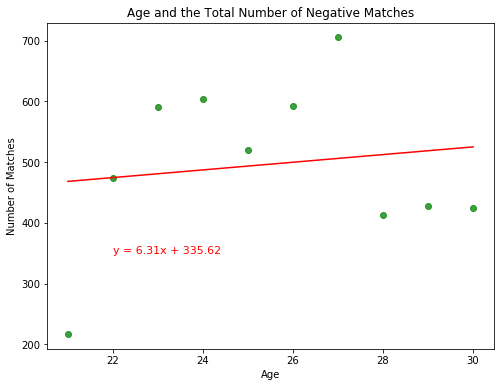

In [42]:
# Scatter plot and line regression with correlation of negative matches per age
age1 = trimmed_age.reset_index()
age2 = age1['Age']
match2 = age1['Negative Matches']

correlation = sts.pearsonr(age2,match2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(age2, match2)
regress_values = age2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(age2, match2, marker="o", facecolors="green",
             alpha=0.75)
plt.plot(age2,regress_values,"r-")

plt.annotate(line_eq,(22,350),fontsize=11,color="red")
plt.title("Age and the Total Number of Negative Matches")
plt.xlabel("Age")
plt.ylabel("Number of Matches")
print(f"The correlation between age and the amount of matches is {round(correlation[0],2)}")
plt.savefig("Output/Q4_images/Fig7.png", bbox_inches = 'tight')
plt.show()

The correlation between age and the amount of matches is -0.08


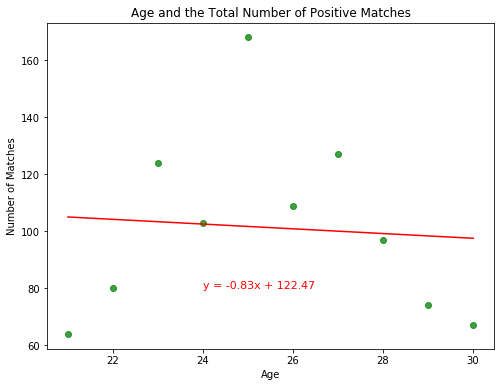

In [43]:
# Scatter plot and line regression with correlation of positive matches per age
yes_age = trimmed_age.reset_index()
age1 = yes_age['Age']
match1 = yes_age['Positive Matches']

correlation = sts.pearsonr(age1,match1)
(slope, intercept, rvalue, pvalue, stderr) = linregress(age1, match1)
regress_values = age1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(age1, match1, marker="o", facecolors="green",
             alpha=0.75)
plt.plot(age1,regress_values,"r-")

plt.annotate(line_eq,(24,80),fontsize=11,color="red")
plt.title("Age and the Total Number of Positive Matches")
plt.xlabel("Age")
plt.ylabel("Number of Matches")
print(f"The correlation between age and the amount of matches is {round(correlation[0],2)}")
plt.savefig("Output/Q4_images/Fig8.png", bbox_inches = 'tight')
plt.show()